<a href="https://colab.research.google.com/github/mshaek/VClass2U/blob/main/S05_Study_Circle_Logistic_reg_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Iris Dataset
Iris is a flower which has 3 classes and it is not easy to distinguish between them with Naked Eye. Iris Dataset is the "Hello World" equivalent of Machine Learning. This type of dataset is commonly found in Biology/botany domain. The task is a Supervised Classification kind.



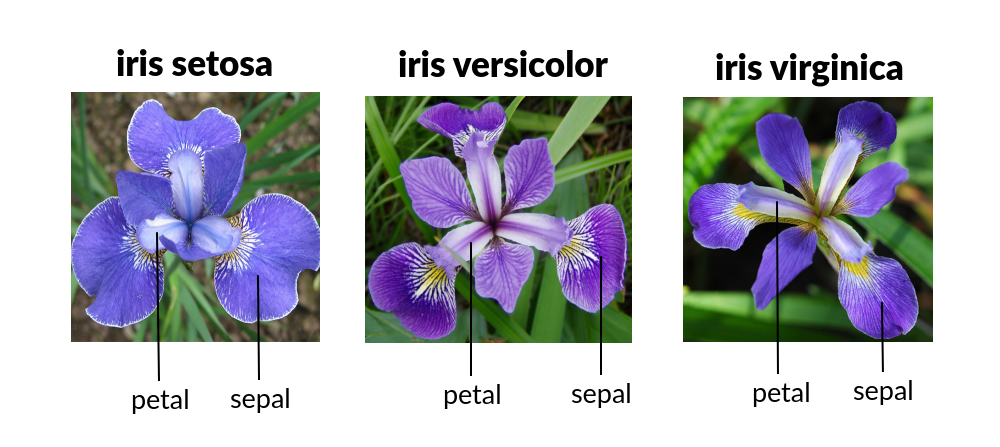

### Difference Between petal and sepal

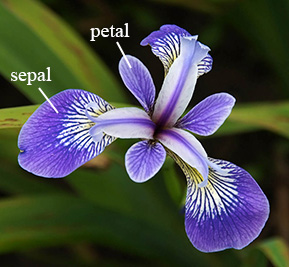

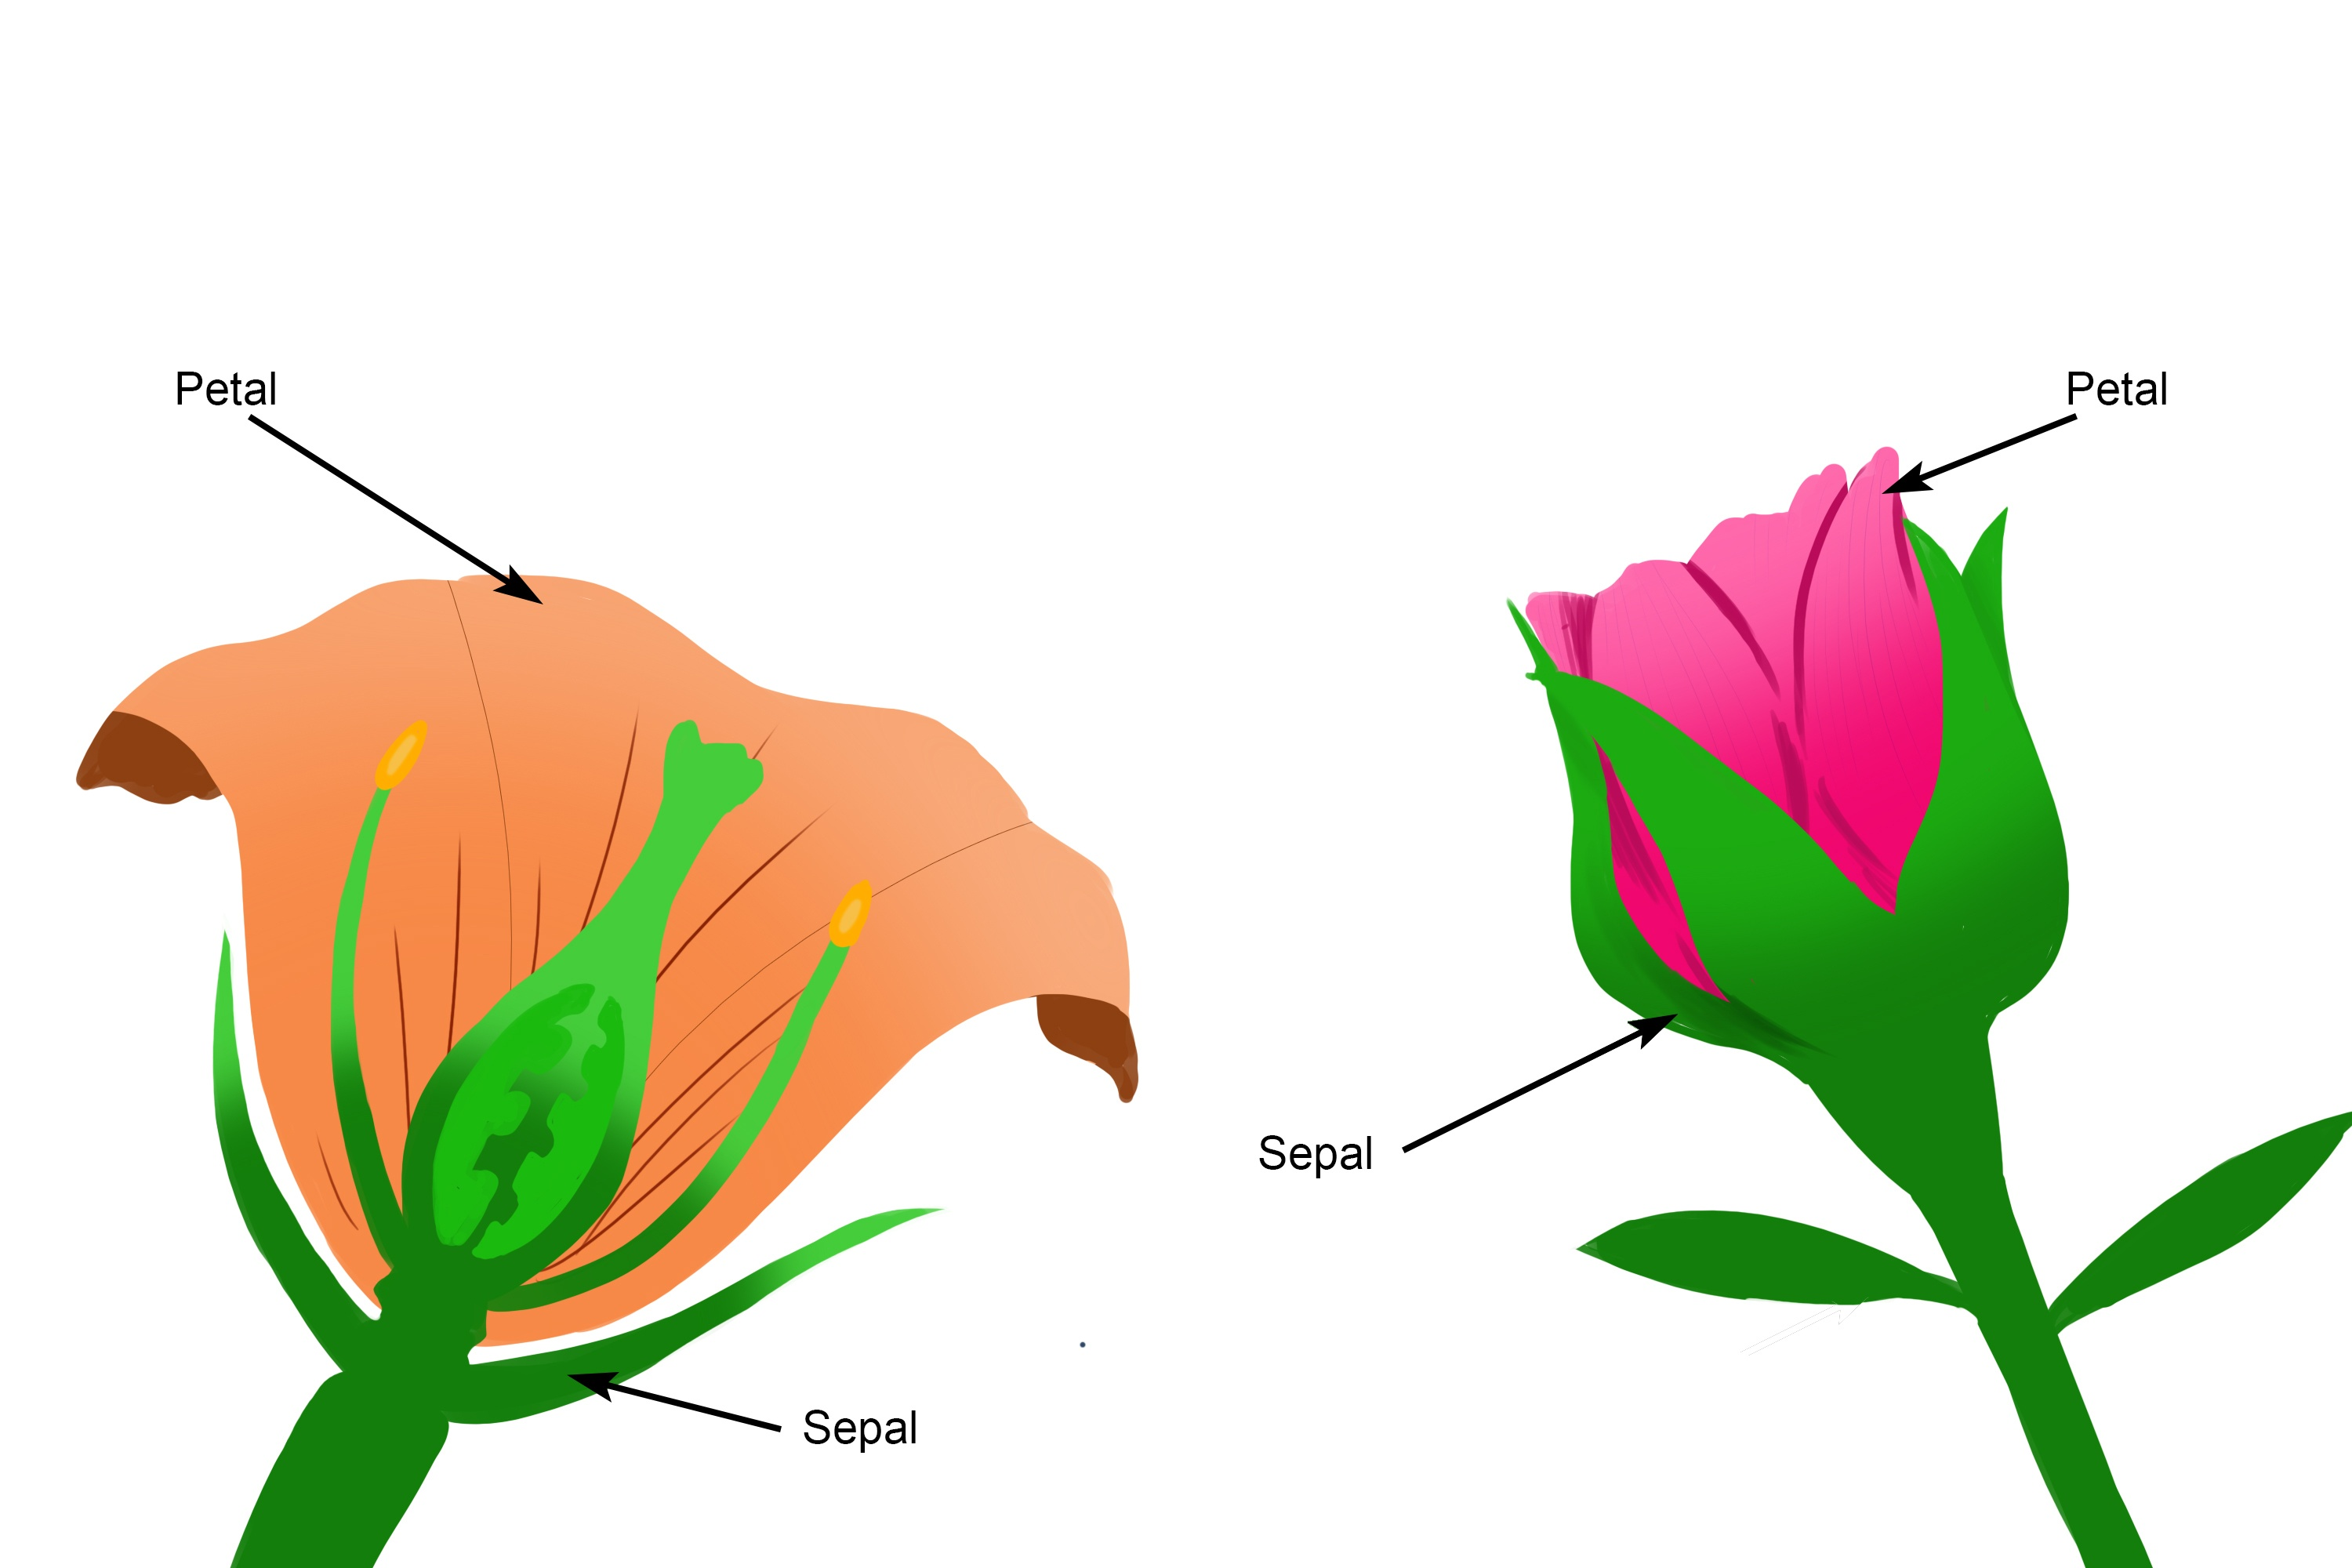

In [ ]:
# Import the dependency Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Load the data set
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print("Number of Rows/observation/data points in the Dataset: ", data.shape[0])
print("Number of columns/features in the Dataset: ", data.shape[1])

Number of Rows/observation/data points in the Dataset:  150
Number of columns/features in the Dataset:  5


### Exploratory Data Analysis
We analyse the data to have better understanding and gain some insights.

In [ ]:
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Mean and meadian are closer therefore we can assume data is normally distributed. The difference between IQR and min/max shows no possible outlier in the dataset.

In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

This dataset does not cointain any missing values.

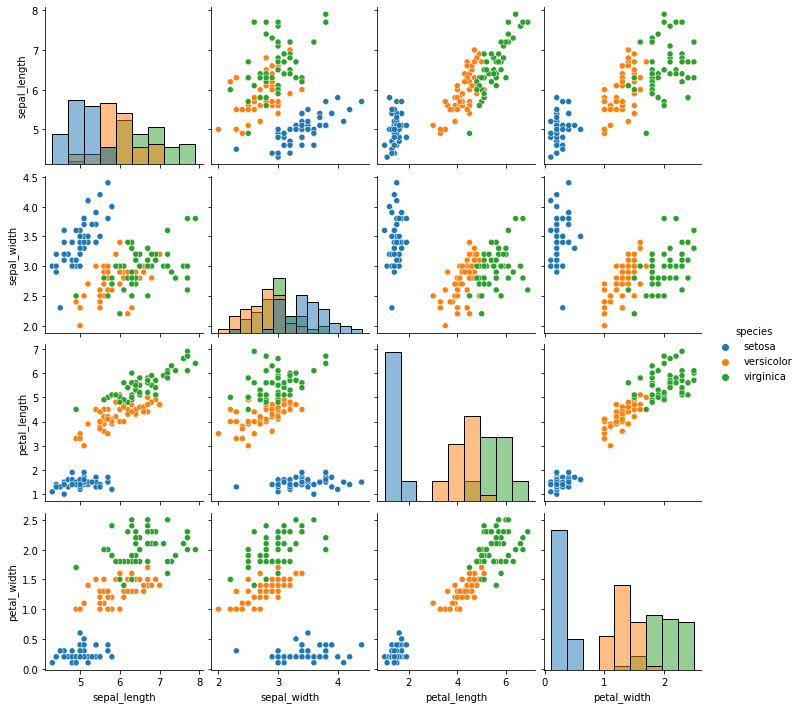

In [ ]:
ax=sns.pairplot(data, hue='species', diag_kind='hist')

The pairplot shows setosa class is clearly seperable from other class. Petal length and width could better distinguish than sepal lenth and width.

In [ ]:
#Class Ratio in the Dataset
data['species'].value_counts(normalize=True)

versicolor    0.333333
virginica     0.333333
setosa        0.333333
Name: species, dtype: float64

Class balance is an important factor in ML Classification task. If dataset is not equally distributed among classes,model will learn majority class better. 

Also **Accuracy** is not a good evaluation metrics for imbalanced Dataset.

Text(0.5, 1.0, 'Class Distribution within Iris Dataset')

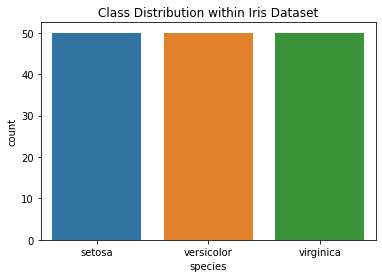

In [ ]:
# Plot the distribution using a barplot
ax=sns.countplot(x='species', data=data)
plt.title("Class Distribution within Iris Dataset")

In [ ]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = data.drop(columns='species')

# y = target values, last column of the data frame
y = data['species']

In [ ]:
print("Shape of the input features: ",X.shape)
print('Shape of the the target variable: ', y.shape)

Shape of the input features:  (150, 4)
Shape of the the target variable:  (150,)


### Data Preprocessing
This data is almost ready for model building. We can normalise/standadise the date if we want to speed up the training process. But all feature are in the same range. So feature scalling will not improve the model much.

In [ ]:
from sklearn import preprocessing
preprocessing.LabelEncoder().fit_transform(data['species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
data['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

### Dataset Spliting
You can split the data into many ratio. It depends on many factors. Such as number of observations in the dataset. If you have too many then you can set lower ratio for training because more data means longer training time. 

In [ ]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [ ]:
#Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e5)
model.fit(x_train, y_train) #Training the model

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Test the model
predictions = model.predict(x_test)

In [ ]:
predictions

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [ ]:
y_test

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: object

In [ ]:
import pandas as pd
Class_comparison= pd.DataFrame(y_test)
Class_comparison['Predicted_label']= predictions
Class_comparison

,species,Predicted_label
73,versicolor,versicolor
18,setosa,setosa
118,virginica,virginica
78,versicolor,versicolor
76,versicolor,versicolor
31,setosa,setosa
64,versicolor,versicolor
141,virginica,virginica
68,versicolor,versicolor
82,versicolor,versicolor


### Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['setosa', 'versicolor', 'virginica'])

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
from sklearn.metrics import accuracy_score
print( accuracy_score(y_test, predictions))

1.0


In [ ]:
#Check precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Inference

In [ ]:
x= [[6.7, 3.0, 5.2, 2.3]]
model.predict(x)

array(['virginica'], dtype=object)

In [ ]:
model.intercept_

In [ ]:
model.predict_proba(x)

array([[3.94314220e-17, 2.71793692e-05, 9.99972821e-01]])

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Next session, we will see how to optimise for better performance(Hypertuning), Feature engineering, Data Preprocessiong, featur selection etc.

In [ ]:
# model.score(y_test,predictions)